In [ ]:
from ParticleSystem import ParticleSystem
import pandas as pd
import os

# Simulation parameters
WORLD_WIDTH = 100
WORLD_HEIGHT = 100
DOT_SIZE = 3
MIDDLE_CLUSTER_SIZE = -1
NUM_ITERATIONS = 5_000_000  # Experiment
INIT_REFRESH_RATE = 10
INIT_PAUSED_STATUS = False
min_cluster_size = 25

# First set of parameters
dct = {'alpha':0.8 , 'mu': 0.4, 'delta': 0.0001, 'epsilon': 0.5} # change alpha
DELTA, MU, EPSILON, ALPHA = dct['delta'], dct['mu'], dct['epsilon'], dct['alpha']

# Excel file name
file_name = f'M{MU}D{DELTA}E{EPSILON}A{ALPHA}_{WORLD_WIDTH}x{WORLD_HEIGHT}_MC{min_cluster_size}_table_experiment.xlsx'

# Ensure the Excel file has the correct column headers if it doesn't exist
if not os.path.isfile(file_name):
    df = pd.DataFrame(columns=[
        "Run ID", "Iteration of first single cluster", "Num clusters at end",
        "Num particles per cluster at end", "Total num particles in clusters at end",
        "Total num particles", "Density of clustered particles"
    ])
    df.to_excel(file_name, index=False, engine="openpyxl")  # Create the file with headers



# Run simulations
for i in range(20):
    world = ParticleSystem(
        WORLD_WIDTH, WORLD_HEIGHT, DELTA, MU, EPSILON, ALPHA,
        DOT_SIZE, MIDDLE_CLUSTER_SIZE, NUM_ITERATIONS,
        INIT_REFRESH_RATE, INIT_PAUSED_STATUS
    )

    # Run the simulation & collect results
    new_row = world.run_simulation_latest_experiement(
        min_cluster_size=min_cluster_size,
        refresh_rate=280, check_rate=25000, init_render_status=False
    )

    existing_df = pd.read_excel(file_name, engine="openpyxl") # Load the existing Excel file
    df_new = pd.DataFrame([new_row])

    excel_df = pd.concat([existing_df, df_new], ignore_index=True)
    excel_df.to_excel(file_name, index=False, engine="openpyxl")

    print(f'Finished World: {i}, Run ID: {int(world.id)}')


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
Finished World: 0, Run ID: 2598
Finished World: 1, Run ID: 2599
Finished World: 2, Run ID: 2600
Finished World: 3, Run ID: 2601
Finished World: 4, Run ID: 2602
Finished World: 5, Run ID: 2603
Finished World: 6, Run ID: 2604
Finished World: 7, Run ID: 2605
Finished World: 8, Run ID: 2606
Finished World: 9, Run ID: 2607
Finished World: 10, Run ID: 2608
Finished World: 11, Run ID: 2609
Finished World: 12, Run ID: 2610
Finished World: 13, Run ID: 2611
Finished World: 14, Run ID: 2612
Finished World: 15, Run ID: 2613
Finished World: 16, Run ID: 2614
Finished World: 17, Run ID: 2615
Finished World: 18, Run ID: 2616
Finished World: 19, Run ID: 2618


: 

In [1]:
from ParticleSystem import ParticleSystem
import pandas as pd
import os

# Simulation parameters
WORLD_WIDTH = 100
WORLD_HEIGHT = 100
DOT_SIZE = 3
MIDDLE_CLUSTER_SIZE = -1
NUM_ITERATIONS = 5_000_000  # Experiment
INIT_REFRESH_RATE = 10
INIT_PAUSED_STATUS = False
min_cluster_size = 25

# First set of parameters
dct = {'alpha':0.8 , 'mu': 0.6, 'delta': 0.0001, 'epsilon': 0.9} # change mu 2
DELTA, MU, EPSILON, ALPHA = dct['delta'], dct['mu'], dct['epsilon'], dct['alpha']

# Excel file name
file_name = f'M{MU}D{DELTA}E{EPSILON}A{ALPHA}_{WORLD_WIDTH}x{WORLD_HEIGHT}_MC{min_cluster_size}_table_experiment.xlsx'

# Ensure the Excel file has the correct column headers if it doesn't exist
if not os.path.isfile(file_name):
    df = pd.DataFrame(columns=[
        "Run ID", "Iteration of first single cluster", "Num clusters at end",
        "Num particles per cluster at end", "Total num particles in clusters at end",
        "Total num particles", "Density of clustered particles"
    ])
    df.to_excel(file_name, index=False, engine="openpyxl")  # Create the file with headers



# Run simulations
for i in range(200):
    world = ParticleSystem(
        WORLD_WIDTH, WORLD_HEIGHT, DELTA, MU, EPSILON, ALPHA,
        DOT_SIZE, MIDDLE_CLUSTER_SIZE, NUM_ITERATIONS,
        INIT_REFRESH_RATE, INIT_PAUSED_STATUS
    )

    # Run the simulation & collect results
    new_row = world.run_simulation_latest_experiement(
        min_cluster_size=min_cluster_size,
        refresh_rate=280, check_rate=25000, init_render_status=False
    )

    existing_df = pd.read_excel(file_name, engine="openpyxl") # Load the existing Excel file
    df_new = pd.DataFrame([new_row])

    excel_df = pd.concat([existing_df, df_new], ignore_index=True)
    excel_df.to_excel(file_name, index=False, engine="openpyxl")

    print(f'Finished World: {i}, Run ID: {int(world.id)}')


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\MichelFaloughi\AppData\Local\Temp\ipykernel_20276\2979407687.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  excel_df = pd.concat([existing_df, df_new], ignore_index=True)


Finished World: 0, Run ID: 1591
Finished World: 1, Run ID: 1596
Finished World: 2, Run ID: 1600
Finished World: 3, Run ID: 1604
Finished World: 4, Run ID: 1608
Finished World: 5, Run ID: 1612
Finished World: 6, Run ID: 1616
Finished World: 7, Run ID: 1621
Finished World: 8, Run ID: 1625
Finished World: 9, Run ID: 1629
Finished World: 10, Run ID: 1633
Finished World: 11, Run ID: 1637
Finished World: 12, Run ID: 1641
Finished World: 13, Run ID: 1645
Finished World: 14, Run ID: 1649
Finished World: 15, Run ID: 1653
Finished World: 16, Run ID: 1657
Finished World: 17, Run ID: 1661
Finished World: 18, Run ID: 1665
Finished World: 19, Run ID: 1669
Finished World: 20, Run ID: 1673
Finished World: 21, Run ID: 1677
Finished World: 22, Run ID: 1681
Finished World: 23, Run ID: 1685
Finished World: 24, Run ID: 1689
Finished World: 25, Run ID: 1693
Finished World: 26, Run ID: 1698
Finished World: 27, Run ID: 1702
Finished World: 28, Run ID: 1706
Finished World: 29, Run ID: 1710
Finished World: 30, 

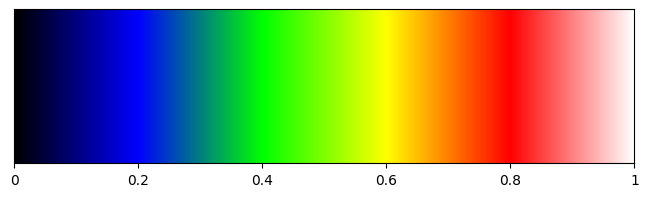

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate colormap
def get_rgb_tuple_from_fraction(fraction):
    assert 0 <= fraction <= 1, "Fraction must be between 0 and 1 inclusive."

    if fraction <= 0.2:  # Black to Blue
        red = 0
        green = 0
        blue = int((fraction / 0.2) * 255)
    elif fraction <= 0.4:  # Blue to Green
        red = 0
        green = int(((fraction - 0.2) / 0.2) * 255)
        blue = 255 - green
    elif fraction <= 0.6:  # Green to Yellow
        red = int(((fraction - 0.4) / 0.2) * 255)
        green = 255
        blue = 0
    elif fraction <= 0.8:  # Yellow to Red
        red = 255
        green = 255 - int(((fraction - 0.6) / 0.2) * 255)
        blue = 0
    else:  # Red to White
        red = 255
        green = int(((fraction - 0.8) / 0.2) * 255)
        blue = green

    return (red / 255, green / 255, blue / 255)

# Generate the colormap
fractions = np.linspace(0, 1, 1000)  # 1000 color steps
colors = [get_rgb_tuple_from_fraction(f) for f in fractions]

# Create the figure
fig, ax = plt.subplots(figsize=(8, 2))
ax.imshow([colors], aspect="auto", extent=[0, 1, 0, 0.2])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1"])
ax.set_yticks([])
# ax.set_title(" Colormap to show degree of clusteredness")

# Save the figure
plt.savefig("custom_colormap.png", dpi=300, bbox_inches="tight")

# Show the figure
plt.show()
